In [22]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

In [6]:
from google.colab import files

uploaded = files.upload()

Saving test_X_r3mO2IZ.csv to test_X_r3mO2IZ.csv


In [7]:
dataset = pd.read_csv("test_X_r3mO2IZ.csv")
dataset.head()

ID  DATASET  ...  POSITION   VALUE
0  DATA_0000_MODEL_0000_TIME_0000_POS_0000        0  ...         0  0.1024
1  DATA_0000_MODEL_0000_TIME_0000_POS_0001        0  ...         1  0.0171
2  DATA_0000_MODEL_0000_TIME_0000_POS_0002        0  ...         2 -0.1838
3  DATA_0000_MODEL_0000_TIME_0000_POS_0003        0  ...         3 -0.3251
4  DATA_0000_MODEL_0000_TIME_0000_POS_0004        0  ...         4 -0.0652

[5 rows x 6 columns]

In [8]:
dataset = dataset.drop('ID', 1)
dataset.head()  

DATASET  MODEL  TIME  POSITION   VALUE
0        0      0     0         0  0.1024
1        0      0     0         1  0.0171
2        0      0     0         2 -0.1838
3        0      0     0         3 -0.3251
4        0      0     0         4 -0.0652

In [28]:
dataset.shape

(1421568, 5)

In [9]:
size1=np.array(dataset.shape)
X = dataset.iloc[:, 0:(size1[1]-1)].values  
y = dataset.iloc[:, (size1[1]-1)].values 

In [10]:

# choose a number of time steps
n_steps = X.shape[1]

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [11]:
# fit model
model.fit(X, y, epochs=500, verbose=0)

In [13]:
# demonstrate prediction
x_input = array([0, 0, 0, 4])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[-0.46223286]]


In [14]:
# demonstrate prediction
x_input = array([0, 0, 0, 4])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[-0.46223286]]


In [15]:
print("Prove the model")

Prove the model


In [16]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [17]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [24]:
#!ls drive

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.save('drive/MLForecastLyon.h5')

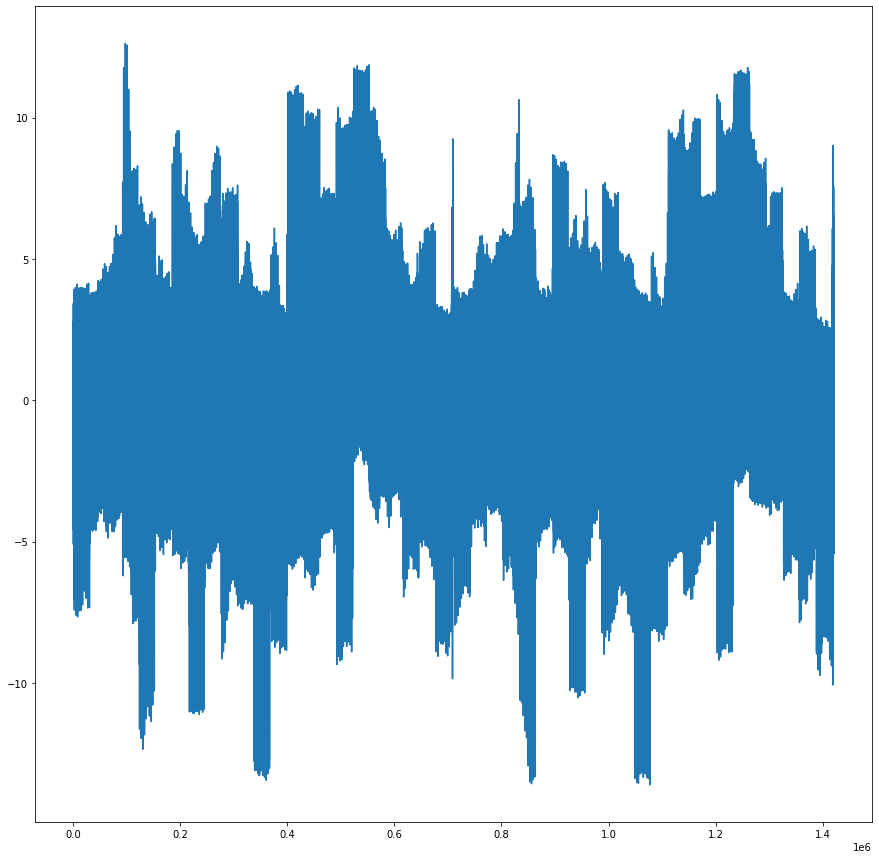

In [23]:
figure(figsize=(15,15))
new = dataset.VALUE
new.plot()

In [25]:
from google.colab import files

uploaded = files.upload()

Saving X_sample.csv to X_sample.csv


In [26]:
dfTest = pd.read_csv("X_sample.csv")
dfTest.head()

ID  DATASET  ...  POSITION   VALUE
0  DATA_0000_MODEL_0000_TIME_0000_POS_0000        0  ...         0  0.4539
1  DATA_0000_MODEL_0000_TIME_0000_POS_0001        0  ...         1  0.4126
2  DATA_0000_MODEL_0000_TIME_0000_POS_0002        0  ...         2  0.2572
3  DATA_0000_MODEL_0000_TIME_0000_POS_0003        0  ...         3  0.1897
4  DATA_0000_MODEL_0000_TIME_0000_POS_0004        0  ...         4  0.3569

[5 rows x 6 columns]

In [27]:
dfTest = dfTest.drop('ID', 1)
dfTest.head()  

DATASET  MODEL  TIME  POSITION   VALUE
0        0      0     0         0  0.4539
1        0      0     0         1  0.4126
2        0      0     0         2  0.2572
3        0      0     0         3  0.1897
4        0      0     0         4  0.3569

In [29]:
size1=np.array(dfTest.shape)
XT = dfTest.iloc[:, 0:(size1[1]-1)].values  
yT = dfTest.iloc[:, (size1[1]-1)].values 

In [33]:
predictions = model.predict(XT)
print(predictions)

[[-0.20530841]
 [-0.35562703]
 [-0.49074027]
 ...
 [ 0.01109794]
 [ 0.01109794]
 [ 0.01109794]]


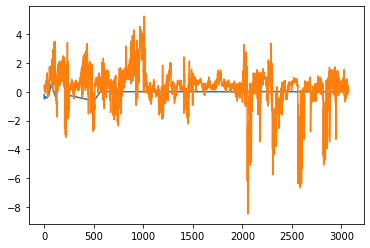

In [39]:
import matplotlib.pyplot as plt
plt.plot(predictions)
plt.plot(yT)
plt.show()